In [ ]:
import os
import pandas as pd
import seaborn as sns

def get_files(path = "../results/training_CNN_v2_lr3/"):

    file_suffix = ".csv"
    dir_list = os.listdir(path)
    dir_list = [f'{path}/{file}' for file in dir_list if file_suffix in file]
    print(f'{len(dir_list)=}')

    return dir_list


def read_series_csv(path):


    df = pd.read_csv(path, skiprows=1, header = None)                 # two columns: index, value [web:31]
    if df.shape[1] == 2:
        df = df.set_index(0).T                       # index to columns, values to a single row [web:63]
        df.columns.name = None

    return df



def format_df(df, 
                metric_cols = [
                "f1_score_weighted","f1_score_macro","precision_weighted","precision_macro",
                "recall_weighted","recall_macro","accuracy","balanced_accuracy","auc_weighted","auc_macro"
                ]):
    

    df[metric_cols] = df[metric_cols].apply(pd.to_numeric)

    df["kmer_suffix_size"] = df["kmer_suffix_size"].apply(pd.to_numeric)

    if "embedding_class" in df.columns:
        
        df["Parameters"] = (
        df["model_name"].astype(str) + ", " +
        df["embedding_class"].astype(str) + ", " +
        df["kmer_prefix"].astype(str) + ", " +
        df["kmer_suffix_size"].astype(str)
        )
    else:
        df["Parameters"] = (
        df["model_name"].astype(str) + ", " +
        df["kmer_prefix"].astype(str) + ", " +
        df["kmer_suffix_size"].astype(str)
        )


    return df

def get_avg(path, id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size"]):
    df = pd.concat((read_series_csv(path) for path in get_files(path)))

    metric_cols = [
        "f1_score_weighted","f1_score_macro","precision_weighted","precision_macro",
        "recall_weighted","recall_macro","accuracy","balanced_accuracy","auc_weighted","auc_macro"
    ]

    df = format_df(df, metric_cols)
    

    avg_by_config = (
        df
        .groupby(id_cols, as_index=False)[metric_cols]
        .mean()
    )
    return avg_by_config

def reformat_x_labels(df_column):
    df_column = df_column.str.replace("_"," ").str.replace("madin","").str.replace("gideon","").str.replace("categorical","").str.strip().str.title()
    return df_column

# def get_max_avg(path, id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size"], get_max = "learning_rate"):
#     metric_cols = [
#         "f1_score_weighted","f1_score_macro","precision_weighted","precision_macro",
#         "recall_weighted","recall_macro","accuracy","balanced_accuracy","auc_weighted","auc_macro"
#     ]
#     df = pd.concat((read_series_csv(path) for path in get_files(path)))

#     df[metric_cols] = df[metric_cols].apply(pd.to_numeric)
    
#     avg_by_config = (
#         df
#         .groupby(id_cols.append(get_max), as_index=False)[metric_cols]
#         .mean()
#     ).groupby()

  


#     return max_by_config
     


len(dir_list)=159


<Axes: title={'center': 'CNN - Balanced Accuracy - learning rate = 0.001'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

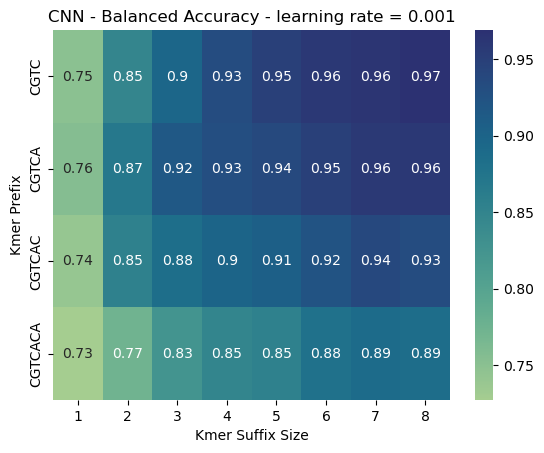

In [115]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

heat = get_avg(path = "../results/training_CNN_v2_lr3/").pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "balanced_accuracy")
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title ="CNN - Balanced Accuracy - learning rate = 0.001")


ax



In [75]:
get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],path = "../results/training_CNN_v2_lr_variable/").groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False).max(["balanced_accuracy"])

len(dir_list)=72


,phenotype,model_name,kmer_prefix,kmer_suffix_size,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,recall_weighted,recall_macro,accuracy,balanced_accuracy,auc_weighted,auc_macro
0,madin_categorical_gram_stain,CNN,CGTCA,1,0.729727,0.727659,0.778258,0.745774,0.728211,0.751314,0.728211,0.751314,0.847057,0.847499
1,madin_categorical_gram_stain,CNN,CGTCA,3,0.897877,0.893597,0.900651,0.894560,0.898020,0.899535,0.898020,0.899535,0.965646,0.965671
2,madin_categorical_gram_stain,CNN,CGTCA,5,0.943231,0.940894,0.943660,0.940835,0.943199,0.941379,0.943199,0.941379,0.984388,0.984345
3,madin_categorical_gram_stain,CNN,CGTCA,7,0.958174,0.956328,0.958368,0.958313,0.958259,0.954649,0.958259,0.954649,0.988886,0.988976
4,madin_categorical_gram_stain,CNN,CGTCAC,1,0.734055,0.725022,0.748637,0.735180,0.735207,0.730890,0.735207,0.730890,0.820215,0.820216
5,madin_categorical_gram_stain,CNN,CGTCAC,2,0.854062,0.847472,0.855349,0.851232,0.854619,0.849940,0.854619,0.849940,0.928654,0.928672
6,madin_categorical_gram_stain,CNN,CGTCACA,1,0.739115,0.727973,0.747307,0.737583,0.741136,0.729153,0.741136,0.729153,0.820940,0.820754
7,madin_categorical_gram_stain,CNN,CGTCACA,2,0.782037,0.775131,0.788769,0.774466,0.781335,0.781348,0.781335,0.781348,0.873115,0.873293


In [14]:
get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_CNN_v2_lr_variable/"
                )

len(dir_list)=86


,phenotype,model_name,kmer_prefix,kmer_suffix_size,learning_rate,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,recall_weighted,recall_macro,accuracy,balanced_accuracy,auc_weighted,auc_macro
0,madin_categorical_gram_stain,CNN,CGTC,1,0.0001,0.715099,0.710089,0.737491,0.715623,0.712202,0.724610,0.712202,0.724610,0.773475,0.773373
1,madin_categorical_gram_stain,CNN,CGTC,1,0.001,0.714252,0.711564,0.758405,0.730123,0.712558,0.735875,0.712558,0.735875,0.803132,0.802756
2,madin_categorical_gram_stain,CNN,CGTC,1,0.01,0.662263,0.667458,0.778942,0.738449,0.669335,0.717040,0.669335,0.717040,0.769119,0.769053
3,madin_categorical_gram_stain,CNN,CGTCA,1,0.0001,0.729727,0.726315,0.762609,0.739075,0.728211,0.745239,0.728211,0.745239,0.844094,0.844508
4,madin_categorical_gram_stain,CNN,CGTCA,1,0.001,0.729625,0.727659,0.772393,0.745774,0.728211,0.751314,0.728211,0.751314,0.847057,0.847499
5,madin_categorical_gram_stain,CNN,CGTCA,1,0.01,0.677743,0.681940,0.778258,0.742820,0.684335,0.725098,0.684335,0.725098,0.813010,0.812730
6,madin_categorical_gram_stain,CNN,CGTCA,2,0.0001,0.775999,0.773535,0.812005,0.786326,0.774220,0.795627,0.774220,0.795627,0.897359,0.897630
7,madin_categorical_gram_stain,CNN,CGTCA,2,0.001,0.839028,0.835048,0.851756,0.834089,0.837424,0.847646,0.837424,0.847646,0.931409,0.931299
8,madin_categorical_gram_stain,CNN,CGTCA,2,0.01,0.871062,0.864599,0.875859,0.875879,0.872406,0.860271,0.872406,0.860271,0.947281,0.947277
9,madin_categorical_gram_stain,CNN,CGTCA,3,0.0001,0.870236,0.866709,0.879851,0.864511,0.869086,0.877774,0.869086,0.877774,0.947408,0.947457


len(dir_list)=201


<Axes: title={'center': 'CNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

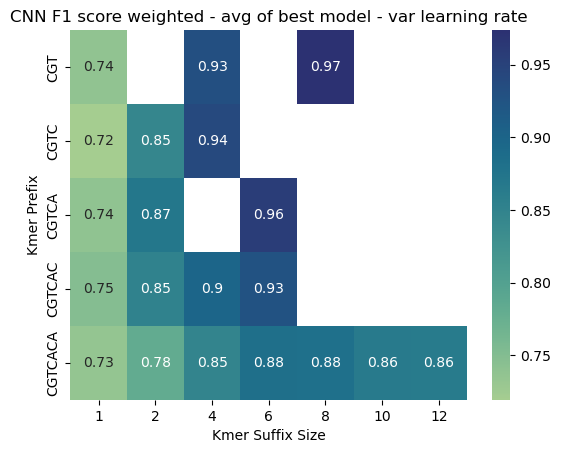

In [71]:
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_CNN_v2_lr_variable/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
heat
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title ="CNN F1 score weighted - avg of best model - var learning rate")


ax

# remove 3,5,7,9 results

len(dir_list)=138


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

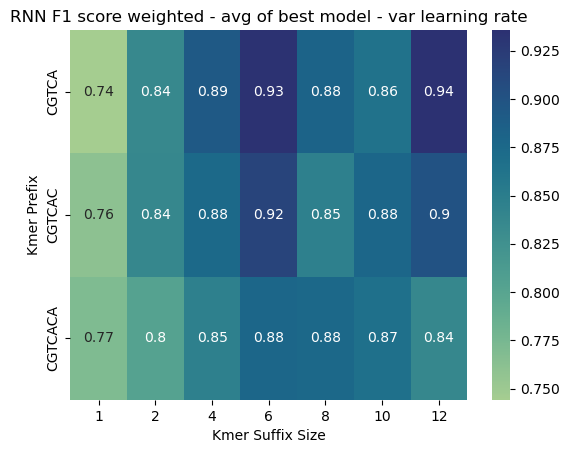

In [4]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_RNN_lr_variable/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate")

ax

#diary antuc

len(dir_list)=77


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

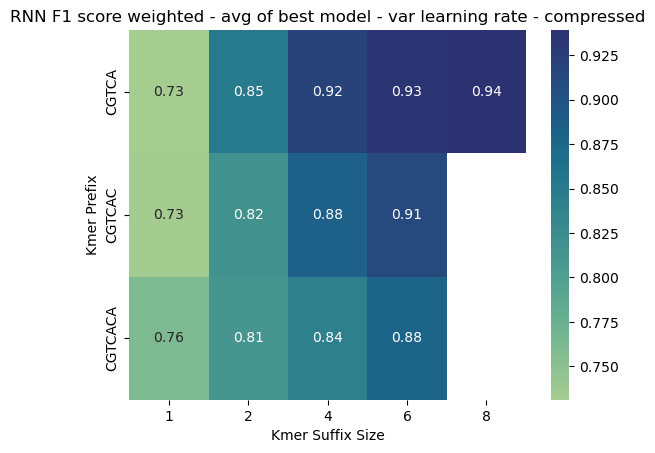

In [112]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_RNN_lr_variable_compressed/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate - compressed")

ax

### Full run

### CNN grid search - uncompressed - not run (yet)

### CNN grid search - compressed

len(dir_list)=108


<Axes: title={'center': 'CNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

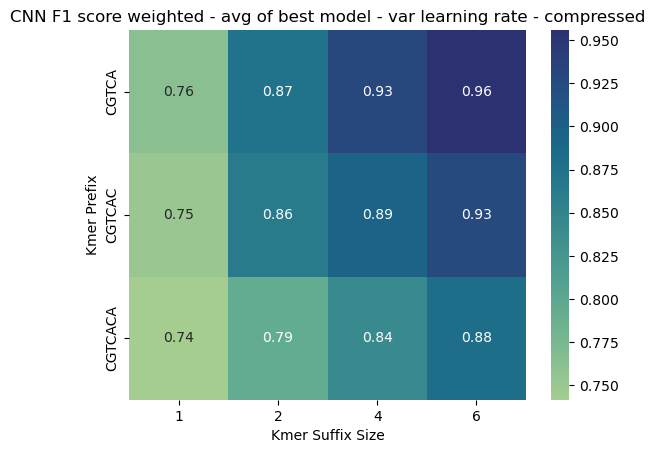

In [5]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/CNN/compressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "CNN F1 score weighted - avg of best model - var learning rate - compressed")

ax



len(dir_list)=150


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

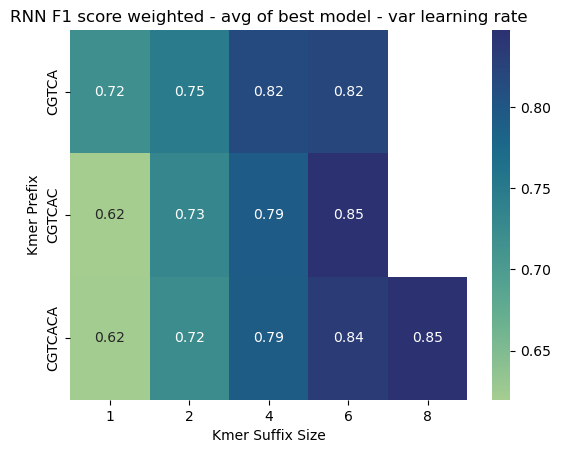

In [6]:
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/RNN/uncompressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate")

ax

#diary antuc

len(dir_list)=102


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

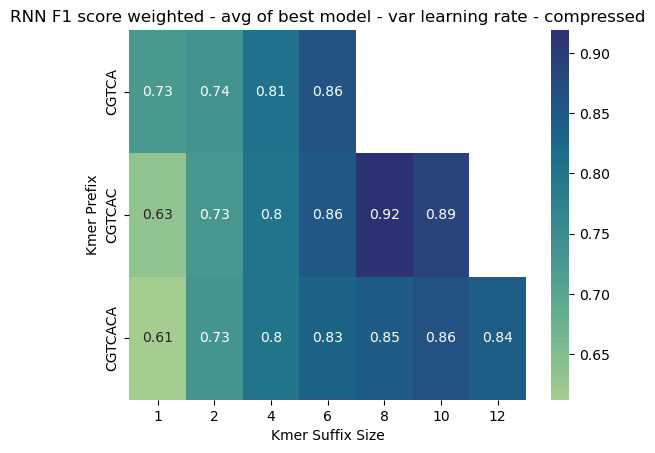

In [7]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/RNN/compressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate - compressed")

ax

### Confusion matrices

In [343]:
def confusion_plot(path):
    df = read_series_csv(path)
    
    df = df[["phenotype","model_name","confusion_matrix","f1_score_weighted","balanced_accuracy"]]

    #print(df)
   
    conf = df.confusion_matrix.to_list()[0].split("\n ")
    conf = [[int(i) for i in i.replace("[","]").replace("]","").split()]  for i in conf]
    #conf_dict = {d.split(": ")[1]: d.split(": ")[0] for d in df["int2label"].iloc[0].replace("{","").replace("}","").replace("'","").split(", ")}
    #print(conf_dict)
    

    #conf_df = pd.DataFrame.from_dict(conf_dict)
    #conf_df = pd.DataFrame(conf, columns = conf_dict.labels, index = conf_dict.labels)
    #print(conf_df)
    ax = sns.heatmap(conf, annot = True, cmap="crest",fmt='g')
    df["phenotype"] = reformat_x_labels(df["phenotype"])
    ax.set(title = f"Confusion matrix for {df['model_name'].iloc[0]} - task: {df['phenotype'].iloc[0]}")

    print(f'{float(df.iloc[0]["balanced_accuracy"])=}, {conf=}')
    

float(df.iloc[0]["balanced_accuracy"])=0.9528711485326473, conf=[[1588, 70], [60, 1093]]


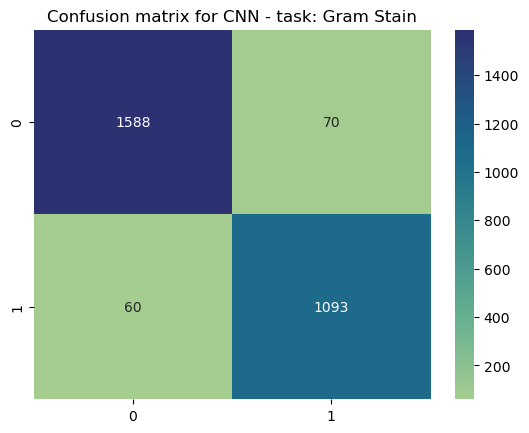

In [344]:
confusion_plot("../results/CNN/compressed/tmp_result_CNN_madin_categorical_gram_stain_COMPRESSED_CGTCA_6_2_0.001.csv")

float(df.iloc[0]["balanced_accuracy"])=0.7361585197165414, conf=[[1051, 664], [154, 942]]


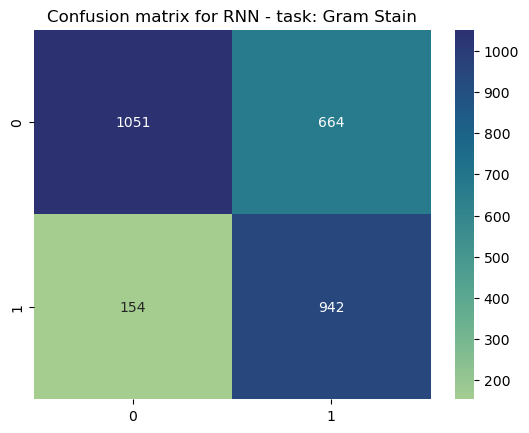

In [345]:
confusion_plot("../results/RNN/compressed/tmp_result_RNN_madin_categorical_gram_stain_COMPRESSED_CGTCA_1_1_0.001.csv")

float(df.iloc[0]["balanced_accuracy"])=0.9263804506753797, conf=[[1607, 83], [110, 1011]]


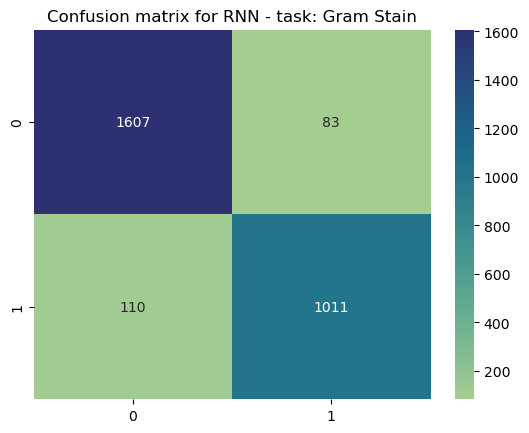

In [346]:
confusion_plot("../results/RNN/compressed/tmp_result_RNN_madin_categorical_gram_stain_COMPRESSED_CGTCAC_8_0_0.001.csv")


### Recreating bacformer papers plot:
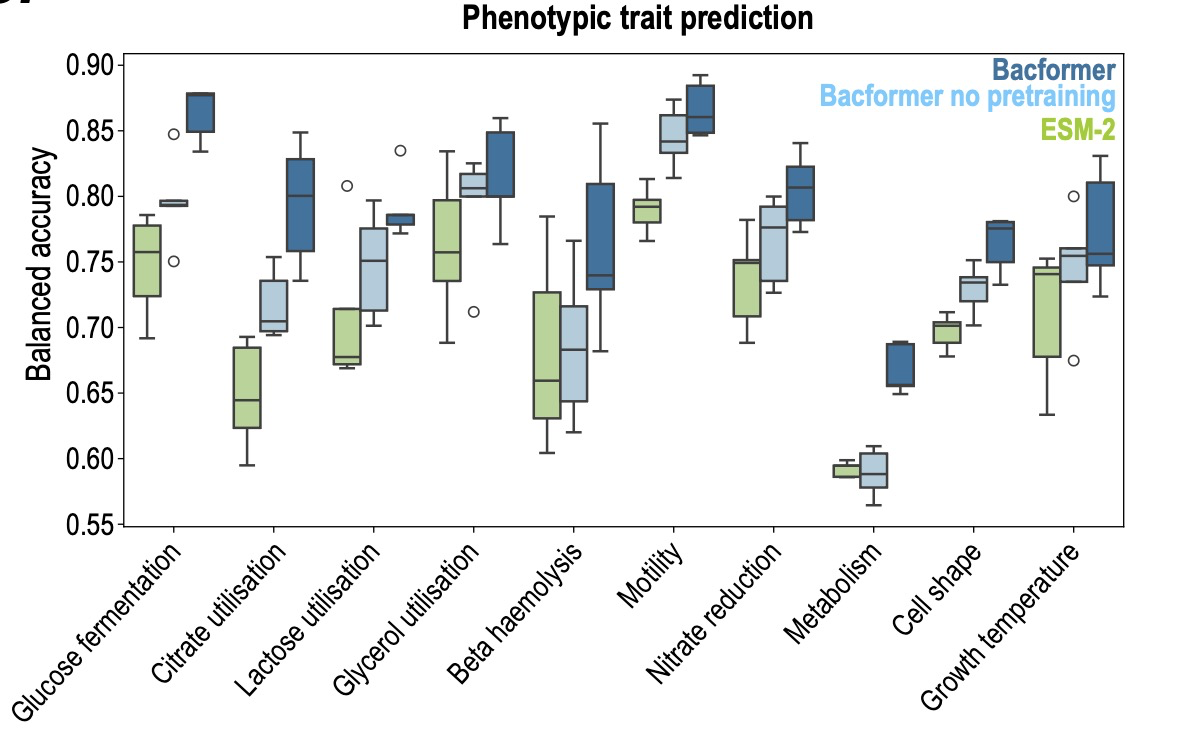


In [36]:

# path = "../results/bacformer_phenotypic_trait_prediction"
# df = pd.concat((read_series_csv(path) for path in get_files(path)))
import pandas as pd
path_2 = "../results/bacformer_phenotypic_trait_prediction/run_2"
#df_2 = pd.concat((df,pd.concat((read_series_csv(path) for path in get_files(path_2)))))

df_2 = pd.concat((read_series_csv(path) for path in get_files(path_2)))
path_3 = "../results/bacformer_phenotypic_trait_prediction/run_3"
df_3 = pd.concat((read_series_csv(path) for path in get_files(path_3)))

df = pd.concat((df_2,df_3))

df = format_df(df)

len(df)


len(dir_list)=52
len(dir_list)=18


70

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_42616/4180233943.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=80)


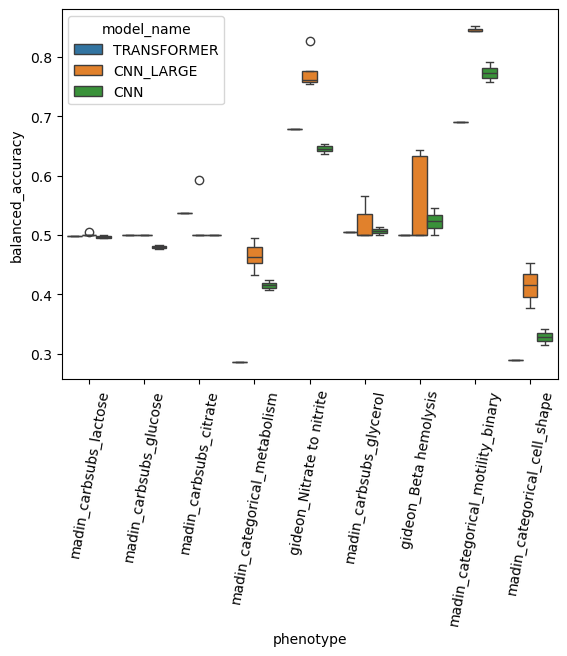

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.boxplot(data = df, y = "balanced_accuracy", x = "phenotype", hue = "model_name")
plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=80)


### RF and HistGradientBoost baselines vs CNN

In [224]:

import pandas as pd
path_1 = "../results/bacformer_phenotypic_trait_prediction/run_5"
df_1 = pd.concat((read_series_csv(path) for path in get_files(path_1)))
path_2 = "../results/bacformer_phenotypic_trait_prediction/rf_baseline"
df_2 = pd.concat((read_series_csv(path) for path in get_files(path_2)))

path_3 = "../results/bacformer_phenotypic_trait_prediction/run_2"
df_3 = pd.concat((read_series_csv(path) for path in get_files(path_3)))

path_4 = "../results/bacformer_phenotypic_trait_prediction"
df_4 = pd.concat((read_series_csv(path) for path in get_files(path_4)))



df = pd.concat((df_1,df_2,df_3, df_4))

df = format_df(df)
df["phenotype"] = reformat_x_labels(df["phenotype"])
print(f'{len(df)=}')


FileNotFoundError: [Errno 2] No such file or directory: '../results/bacformer_phenotypic_trait_prediction/run_5'

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_42616/2414564112.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


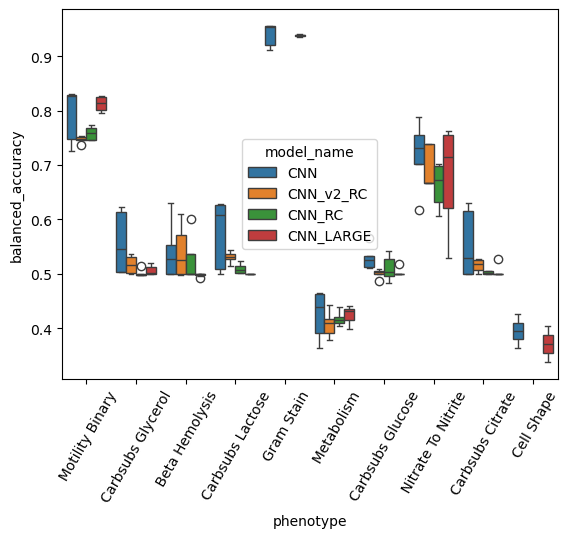

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.boxplot(data = df[df["kmer_prefix"]=="CGTCA"], y = "balanced_accuracy", x = "phenotype", hue = "model_name")
plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

plt.show()

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_42616/3452362180.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


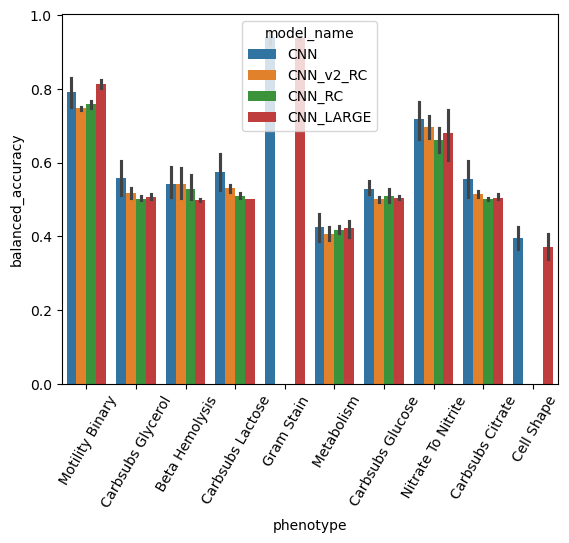

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.barplot(data = df[df["kmer_prefix"]=="CGTCA"], y = "balanced_accuracy", x = "phenotype", hue = "model_name")
plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

plt.show()

### Plots

In [96]:

import pandas as pd


#### Baselines ####

path_rf_baseline = "../results/bacformer_phenotypic_trait_prediction/rf_baseline/RandomForest"
df_rf_baseline = pd.concat((read_series_csv(path) for path in get_files(path_rf_baseline)))

path_hgb_baseline = "../results/bacformer_phenotypic_trait_prediction/rf_baseline/HistGradientBoosting"
df_hgb_baseline = pd.concat((read_series_csv(path) for path in get_files(path_hgb_baseline)))


#### CNN ####

# Simple CNN
path_CNN = "../results/bacformer_phenotypic_trait_prediction/CNN_benchmarks/CNN"
df_CNN = pd.concat((read_series_csv(path) for path in get_files(path_CNN)))

# Simple CNN w reverse complement
path_CNN_RC = "../results/bacformer_phenotypic_trait_prediction/CNN_benchmarks/CNN_RC"
df_CNN_RC = pd.concat((read_series_csv(path) for path in get_files(path_CNN_RC)))

df_CNN_RC.loc[df_CNN_RC["model_name"] == "CNN_v2", "model_name"] = "CNN_v2_RC"
df_CNN_RC = df_CNN_RC[df_CNN_RC["model_name"] != "CNN_v2_RC"]
df_CNN_RC.loc[df_CNN_RC["model_name"] == "CNN", "model_name"] = "CNN_RC"

# Larger CNN w/o reverse complement
path_CNN_large = "../results/bacformer_phenotypic_trait_prediction/CNN_benchmarks/CNN_LARGE"
df_CNN_large = pd.concat((read_series_csv(path) for path in get_files(path_CNN_large)))

df_CNN = pd.concat((df_rf_baseline, df_hgb_baseline, df_CNN, df_CNN_RC, df_CNN_large))

df_CNN = format_df(df_CNN)
print(f'{len(df_CNN)=}')

#### RNN ####

# Simple RNN
path_RNN = "../results/bacformer_phenotypic_trait_prediction/RNN_benchmarks/RNN/" 
df_RNN = pd.concat((read_series_csv(path) for path in get_files(path_RNN)))

# Simple RNN with reverse complement
path_RNN_RC = "../results/bacformer_phenotypic_trait_prediction/RNN/RNN_RC/" 
df_RNN_RC = pd.concat((read_series_csv(path) for path in get_files(path_RNN_RC)))
df_RNN_RC.loc[df_RNN_RC["model_name"] == "RNN", "model_name"] = "RNN_RC"

# RNN with MLP and masking
path_RNN_MLP = "../results/bacformer_phenotypic_trait_prediction/RNN/RNN_MLP_RC/run_001/" 
df_RNN_MLP = pd.concat((read_series_csv(path) for path in get_files(path_RNN_MLP)))
df_RNN_MLP.loc[df_RNN_MLP["model_name"] == "RNN_MLP", "model_name"] = "RNN_MLP_RC"

# RNN with MLP - onehot encodings
path_RNN_MLP_onehot = "../results/bacformer_phenotypic_trait_prediction/RNN/MLP_ONEHOT_001"
df_RNN_MLP_onehot = pd.concat((read_series_csv(path) for path in get_files(path_RNN_MLP_onehot)))
df_RNN_MLP_onehot= df_RNN_MLP_onehot[df_RNN_MLP_onehot["model_name"] != "RNN_MLP_ONEHOT_SMALL"]

# RNN w MLP - ESMC embeddings
path_RNN_MLP_ESMC = "../results/bacformer_phenotypic_trait_prediction/RNN/MLP_ESMC_001/"
df_RNN_MLP_ESMC = pd.concat((read_series_csv(path) for path in get_files(path_RNN_MLP_ESMC)))
df_RNN_MLP_ESMC.loc[df_RNN_MLP_ESMC["model_name"] == "RNN_MLP_ONEHOT", "model_name"] = "RNN_MLP_ESMC"
#df_RNN_MLP_ESMC.["legend"] = "RNN_MLP_ESMC"

#df_RNN_MLP_ESMC= df_RNN_MLP_ESMC[df_RNN_MLP_ESMC["learning_rate"] == 0.001]

df_RNN = pd.concat((df_rf_baseline,df_hgb_baseline,df_RNN, df_RNN_RC, df_RNN_MLP, df_RNN_MLP_onehot,df_RNN_MLP_ESMC))

df_RNN = format_df(df_RNN)
print(f'{len(df_RNN)=}')


df_ALLvsALL = pd.concat((df_rf_baseline,df_hgb_baseline, df_RNN_RC, df_RNN_MLP, df_CNN, df_CNN_RC, df_CNN_large))
df_ALLvsALL = format_df(df_ALLvsALL)
print(f'{len(df_ALLvsALL)=}')


df_best_vs_worst = pd.concat((df_rf_baseline,df_hgb_baseline, df_RNN_MLP, df_CNN_large))
df_best_vs_worst = format_df(df_best_vs_worst)



len(dir_list)=40
len(dir_list)=40
len(dir_list)=47
len(dir_list)=80
len(dir_list)=80
len(df_CNN)=247
len(dir_list)=29
len(dir_list)=40
len(dir_list)=40
len(dir_list)=101
len(dir_list)=89
len(df_RNN)=349
len(df_ALLvsALL)=527


#### CNNs vs baseline

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_21625/2630703785.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=75)


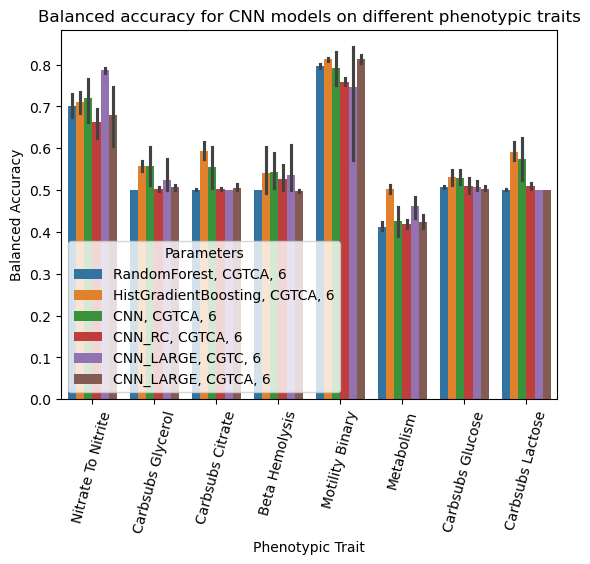

In [97]:

import matplotlib.pyplot as plt
import seaborn as sns

df_CNN["phenotype"] = reformat_x_labels(df_CNN["phenotype"])
plot = sns.barplot(data = df_CNN[~df_CNN["phenotype"].isin(["Gram Stain", "Cell Shape"])], y = "balanced_accuracy", x = "phenotype", hue = "Parameters",)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
plot.set_title('Balanced accuracy for CNN models on different phenotypic traits')
plot.set_ylabel('Balanced Accuracy')
plot.set_xlabel('Phenotypic Trait')
sns.move_legend(plot, "lower left")

#### RNNs vs baseline

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_21625/2468808821.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


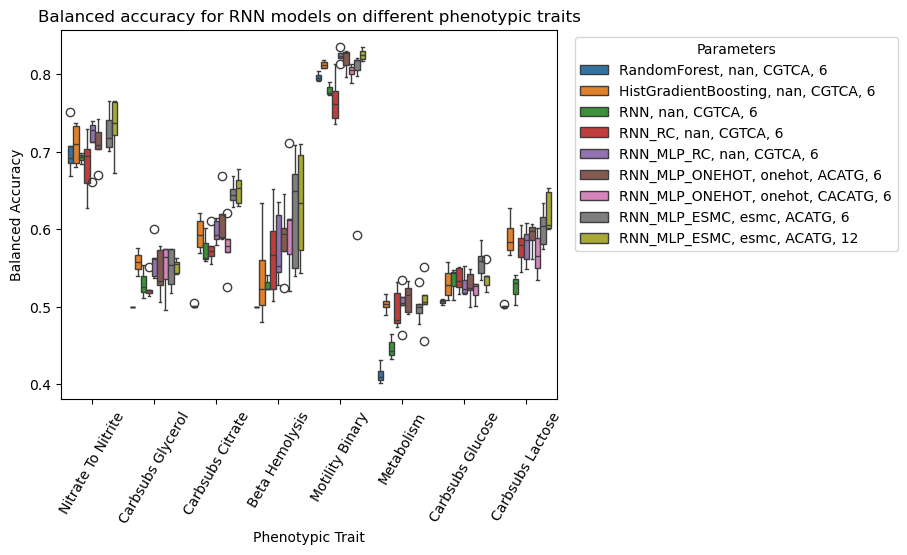

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

df_RNN["phenotype"] = reformat_x_labels(df_RNN["phenotype"])
plot = sns.boxplot(data = df_RNN[~df_RNN["phenotype"].isin(["Gram Stain", "Cell Shape"])], y = "balanced_accuracy", x = "phenotype", hue = "Parameters")
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plot.set_title('Balanced accuracy for RNN models on different phenotypic traits')
plot.set_ylabel('Balanced Accuracy')
plot.set_xlabel('Phenotypic Trait')
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.7, 1))

### All vs all

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_21625/1246336773.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


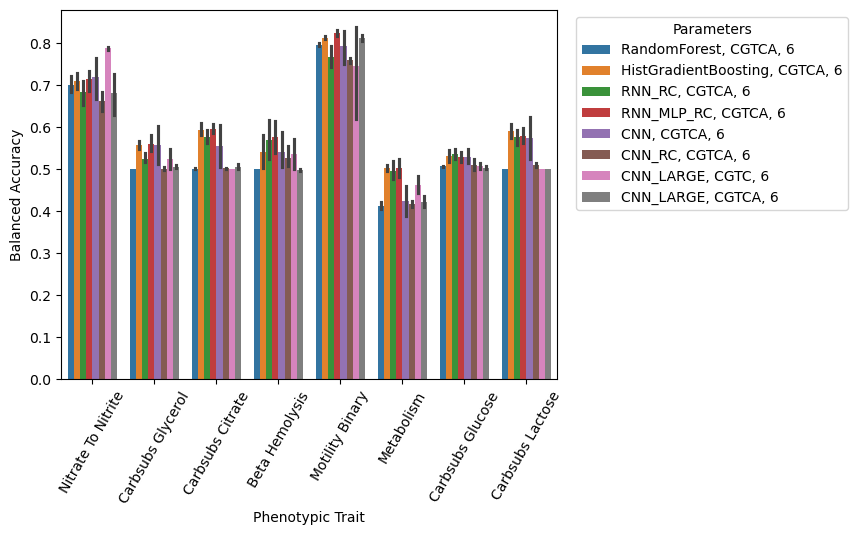

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ALLvsALL["phenotype"] = reformat_x_labels(df_ALLvsALL["phenotype"])

plot = sns.barplot(data = df_ALLvsALL[~df_ALLvsALL["phenotype"].isin(["Gram Stain","Cell Shape"])], y = "balanced_accuracy", x = "phenotype", hue = "Parameters")
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plot.set_ylabel('Balanced Accuracy')
plot.set_xlabel('Phenotypic Trait')
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.6, 1))

#### Best vs worst

/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_21625/2303110743.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


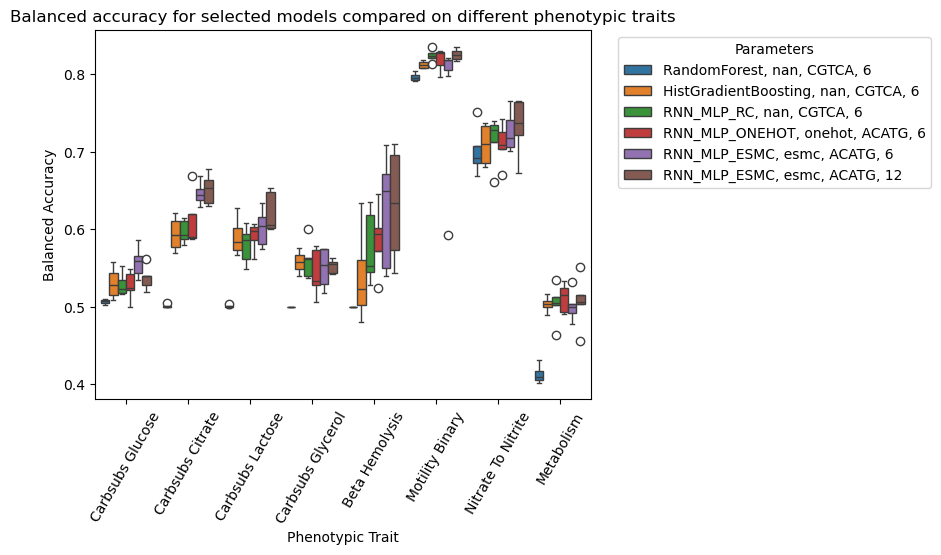

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns


df_best_vs_worst = pd.concat((df_rf_baseline,df_hgb_baseline, df_RNN_MLP, df_RNN_MLP_onehot[df_RNN_MLP_onehot["kmer_prefix"] == "ACATG"], df_RNN_MLP_ESMC))
df_best_vs_worst = format_df(df_best_vs_worst)

df_best_vs_worst["phenotype"] = reformat_x_labels(df_best_vs_worst["phenotype"])
df_best_vs_worst = df_best_vs_worst[~df_best_vs_worst["model_name"].isin(["CNN"])]
plot = sns.boxplot(data = df_best_vs_worst[~df_best_vs_worst["phenotype"].isin(["Gram Stain","Cell Shape"])], 
                   y = "balanced_accuracy", 
                   x = "phenotype", 
                   hue = "Parameters",
                
                   order=['Carbsubs Glucose', 'Carbsubs Citrate', 'Carbsubs Lactose', 'Carbsubs Glycerol', "Beta Hemolysis", "Motility Binary", "Nitrate To Nitrite", "Metabolism"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plot.set_title('Balanced accuracy for selected models compared on different phenotypic traits')
plot.set_ylabel('Balanced Accuracy')
plot.set_xlabel('Phenotypic Trait')
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.7, 1))

### RNN MLP RC

float(df.iloc[0]["balanced_accuracy"])=0.8269659683239776, conf=[[1559, 297], [288, 1260]]


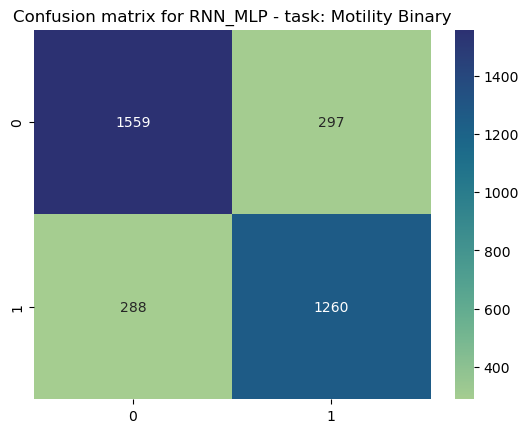

In [353]:
confusion_plot("../results/bacformer_phenotypic_trait_prediction/RNN/RNN_MLP_RC/run_001/tmp_result_RNN_MLP_madin_categorical_motility_binary_UNCOMPRESSED_CGTCA_6_0_0.0003.csv")


float(df.iloc[0]["balanced_accuracy"])=0.8132217330192284, conf=[[1486, 460], [200, 1258]]


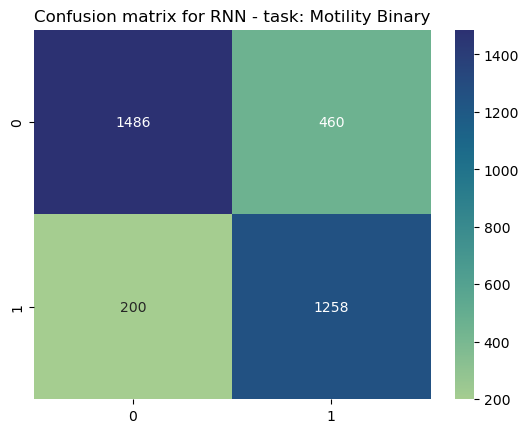

In [357]:
confusion_plot("../results/bacformer_phenotypic_trait_prediction/RNN/RNN_RC/tmp_result_RNN_madin_categorical_motility_binary_UNCOMPRESSED_CGTCA_6_4_0.0003.csv")

### CNN

float(df.iloc[0]["balanced_accuracy"])=0.7590697973823008, conf=[[1635, 263], [517, 989]]


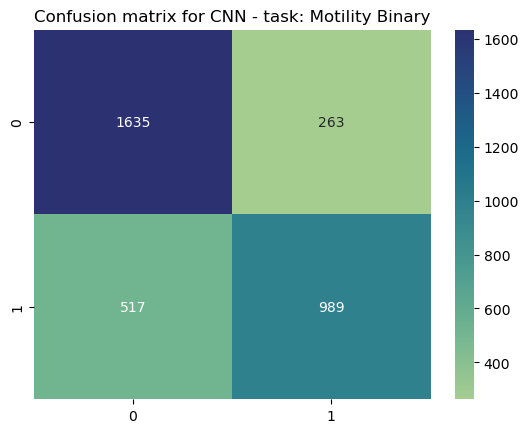

In [354]:
confusion_plot("../results/bacformer_phenotypic_trait_prediction/CNN_benchmarks/CNN_RC/tmp_result_CNN_madin_categorical_motility_binary_UNCOMPRESSED_CGTCA_6_1_0.001.csv")

### Messy old code

In [59]:

import pandas as pd
path_1 = "../results/bacformer_phenotypic_trait_prediction/run_5"
df_1 = pd.concat((read_series_csv(path) for path in get_files(path_1)))
path_2 = "../results/bacformer_phenotypic_trait_prediction/rf_baseline"
df_2 = pd.concat((read_series_csv(path) for path in get_files(path_2)))

path_3 = "../results/bacformer_phenotypic_trait_prediction/run_2"
df_3 = pd.concat((read_series_csv(path) for path in get_files(path_3)))

# path_4 = "../results/bacformer_phenotypic_trait_prediction" 
# df_4 = pd.concat((read_series_csv(path) for path in get_files(path_4))) 


path_5 = "../results/bacformer_phenotypic_trait_prediction/RNN_MLP/run_001" # RNN with MLP and masking
df_5 = pd.concat((read_series_csv(path) for path in get_files(path_5)))


df_5.loc[df_5["model_name"] == "RNN_MLP", "model_name"] = "RNN_MLP"

path = "../results/bacformer_phenotypic_trait_prediction/RNN_RC/run_001" # Simple RNN with reverse complement augmentation
df_6 = pd.concat((read_series_csv(path) for path in get_files(path)))
df_6.loc[df_6["model_name"] == "RNN", "model_name"] = "RNN_RC"

df = pd.concat((df_1,df_2,df_3,  df_5, df_6))

df = format_df(df)[df["kmer_prefix"]=="CGTCA"]
print(f'{len(df)=}')



FileNotFoundError: [Errno 2] No such file or directory: '../results/bacformer_phenotypic_trait_prediction/run_5'

In [160]:
df[df["phenotype"] == "madin_categorical_motility_binary"]

,phenotype,model_name,kmer_prefix,kmer_suffix_size,learning_rate,seed,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,...,balanced_accuracy,auc_weighted,auc_macro,n_classes,vocab_compression,confusion_matrix,int2label,peak_allocated_gib,peak_reserved_gib,intx2label
1,madin_categorical_motility_binary,CNN_LARGE,CGTCA,6,0.001,2,0.821781,0.821193,0.829553,0.823464,...,0.826344,0.858594,0.858253,2,True,[[727 209]\n [ 95 671]],"{0: 'no', 1: 'yes'}",0.8581771850585938,2.041015625,NaN
1,madin_categorical_motility_binary,CNN,CGTCA,6,0.001,4,0.737690,0.728274,0.768322,0.775616,...,0.726108,0.827537,0.827214,2,True,[[877 79]\n [347 399]],"{0: 'no', 1: 'yes'}",2.808022975921631,8.162109375,NaN
1,madin_categorical_motility_binary,CNN,CGTCA,6,0.001,2,0.754070,0.747703,0.784650,0.791464,...,0.746015,0.829504,0.829942,2,True,[[865 71]\n [331 435]],"{0: 'no', 1: 'yes'}",2.808022975921631,8.162109375,NaN
1,madin_categorical_motility_binary,CNN,CGTCA,6,0.001,3,0.755530,0.749790,0.755635,0.753010,...,0.747954,0.850214,0.850335,2,True,[[786 182]\n [232 502]],"{0: 'no', 1: 'yes'}",2.808022975921631,8.162109375,NaN
1,madin_categorical_motility_binary,CNN_LARGE,CGTCA,6,0.001,0,0.820655,0.818038,0.821919,0.816885,...,0.820033,0.853045,0.855431,2,True,[[791 172]\n [134 605]],"{0: 'no', 1: 'yes'}",0.8581771850585938,2.041015625,NaN
1,madin_categorical_motility_binary,CNN,CGTCA,6,0.001,0,0.749651,0.740126,0.776392,0.783609,...,0.736384,0.836849,0.835834,2,True,[[884 79]\n [329 410]],"{0: 'no', 1: 'yes'}",2.808022975921631,8.162109375,NaN
1,madin_categorical_motility_binary,CNN_LARGE,CGTCA,6,0.001,1,0.830319,0.827234,0.830486,0.826797,...,0.827720,0.848960,0.847691,2,True,[[818 149]\n [140 595]],"{0: 'no', 1: 'yes'}",0.8581771850585938,2.041015625,NaN
1,madin_categorical_motility_binary,CNN,CGTCA,6,0.001,1,0.761110,0.752999,0.773081,0.776827,...,0.748402,0.852196,0.852157,2,True,[[858 109]\n [287 448]],"{0: 'no', 1: 'yes'}",2.808022975921631,8.162109375,NaN
1,madin_categorical_motility_binary,RandomForest,CGTCA,6,NaN,NaN,0.799064,0.794505,0.803201,0.804940,...,0.790808,NaN,NaN,2,NaN,[[838 116]\n [222 526]],NaN,NaN,NaN,"{0: 'no', 1: 'yes'}"
1,madin_categorical_motility_binary,HistGradientBoosting,CGTCA,6,NaN,2,0.813600,0.812433,0.816338,0.812119,...,0.815072,NaN,NaN,2,NaN,[[745 191]\n [127 639]],NaN,NaN,NaN,"{0: 'no', 1: 'yes'}"


/var/folders/sc/q50j7pq53n3d66jypdgbp6_00000gn/T/ipykernel_42616/1873438636.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=80)


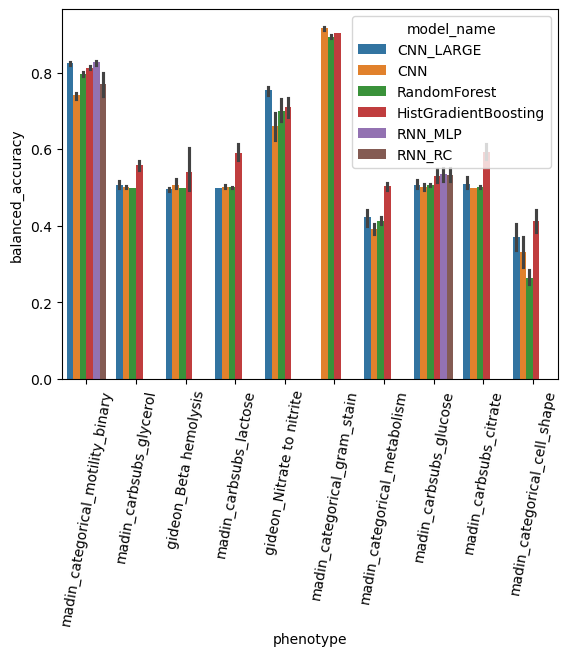

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.barplot(data = df, y = "balanced_accuracy", x = "phenotype", hue = "model_name")
plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=80)
